## Assignment No.2

Data Discretization and Data Normalization. Use any suitable dataset (e.g. heart dataset 
https://www.kaggle.com/zhaoyingzhu/heartesv ). Perform following operations on given dataset 
suitable programming language.

a) Find standard deviation, variance of every numerical attribute.

b) Find covariance and perform Correlation analysis using Correlation coefficient.

c) How many independent features are present in the given dataset?

d) Can we identify unwanted features?

e) Perform the data discretization using equi frequency binning method on age attribute

f) Normalize RestBP, chol, and MaxHR attributes (considering above dataset) using minmax normalization, Z-score normalization, and decimal scaling normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data Understanding

In [3]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
data.shape

(400, 11)

In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.select_dtypes(include=['number']).skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [8]:
X=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education']

In [9]:
for i in X:
    print(f"The Kurtosis of {i}== {data[i].kurtosis()}")

The Kurtosis of Sales== -0.08087736743346197
The Kurtosis of CompPrice== 0.041666402841529226
The Kurtosis of Income== -1.0852889894205275
The Kurtosis of Advertising== -0.54511783750007
The Kurtosis of Population== -1.2023183469881713
The Kurtosis of Price== 0.45188500467657766
The Kurtosis of Age== -1.1343919819459476
The Kurtosis of Education== -1.2983317016794282


Numerical: Sales,CompPrice,Income,Advertising ,Population ,Price,Age ,Education 
ShelveLoc (categorical - 'Bad', 'Good', 'Medium')

Urban (categorical - 'Yes', 'No')

US (categorical - 'Yes', 'No')

Now, let's perform the required operations:

Standard Deviation & Variance for numerical attributes.

Covariance & Correlation Analysis.

Identify Independent Features.

Detect Unwanted Features.

Data Discretization (Equi-Frequency binning on 'Age').

Normalization (Min-Max, Z-score, and Decimal Scaling for 'Price', 'Income', and 'Advertising').

In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [11]:
#Standard Deviation and Variance

std_dev=data.select_dtypes(include=['number']).std()
print("\nStandard Deviations are: \n\n",std_dev)


Standard Deviations are: 

 Sales            2.824115
CompPrice       15.334512
Income          27.986037
Advertising      6.650364
Population     147.376436
Price           23.676664
Age             16.200297
Education        2.620528
dtype: float64


In [12]:
variance=data.select_dtypes(include=['number']).var()
print("\nVariances are: \n\n",variance)


Variances are: 

 Sales              7.975626
CompPrice        235.147243
Income           783.218239
Advertising       44.227343
Population     21719.813935
Price            560.584436
Age              262.449618
Education          6.867168
dtype: float64


In [13]:
#Covariance and Correlation Matrix

cov_matrix=data.select_dtypes(include=['number']).cov()
print("\nCovariance matrix : \n\n",cov_matrix)


Covariance matrix : 

                  Sales   CompPrice      Income  Advertising    Population  \
Sales         7.975626    2.775021   12.009565     5.061713     21.006428   
CompPrice     2.775021  235.147243  -34.612594    -2.467794   -214.031579   
Income       12.009565  -34.612594  783.218239    10.979937    -32.488521   
Advertising   5.061713   -2.467794   10.979937    44.227343    260.367519   
Population   21.006428 -214.031579  -32.488521   260.367519  21719.813935   
Price       -29.751908  212.340727  -37.569135     7.012707    -42.373734   
Age         -10.605905  -24.901692   -2.117337    -0.491015   -101.860551   
Education    -0.384504    1.012531   -4.169674    -0.585464    -41.083709   

                  Price         Age  Education  
Sales        -29.751908  -10.605905  -0.384504  
CompPrice    212.340727  -24.901692   1.012531  
Income       -37.569135   -2.117337  -4.169674  
Advertising    7.012707   -0.491015  -0.585464  
Population   -42.373734 -101.860551 -

In [14]:
corr_matrix=data.select_dtypes(include=['number']).corr()
print("\nCorrelation matrix : \n\n",corr_matrix)


Correlation matrix : 

                 Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  


<Axes: xlabel='Sales', ylabel='Price'>

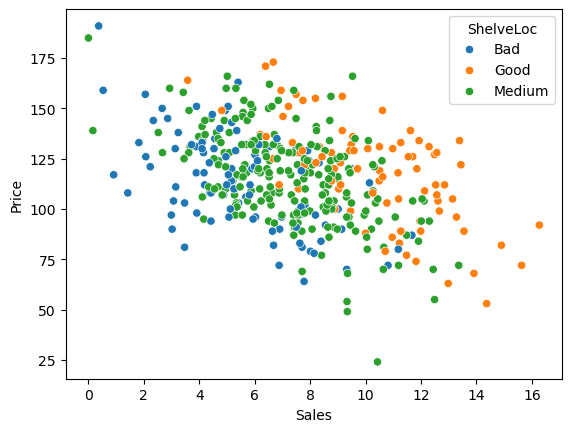

In [15]:
sns.scatterplot(data,x='Sales',y='Price',hue='ShelveLoc')

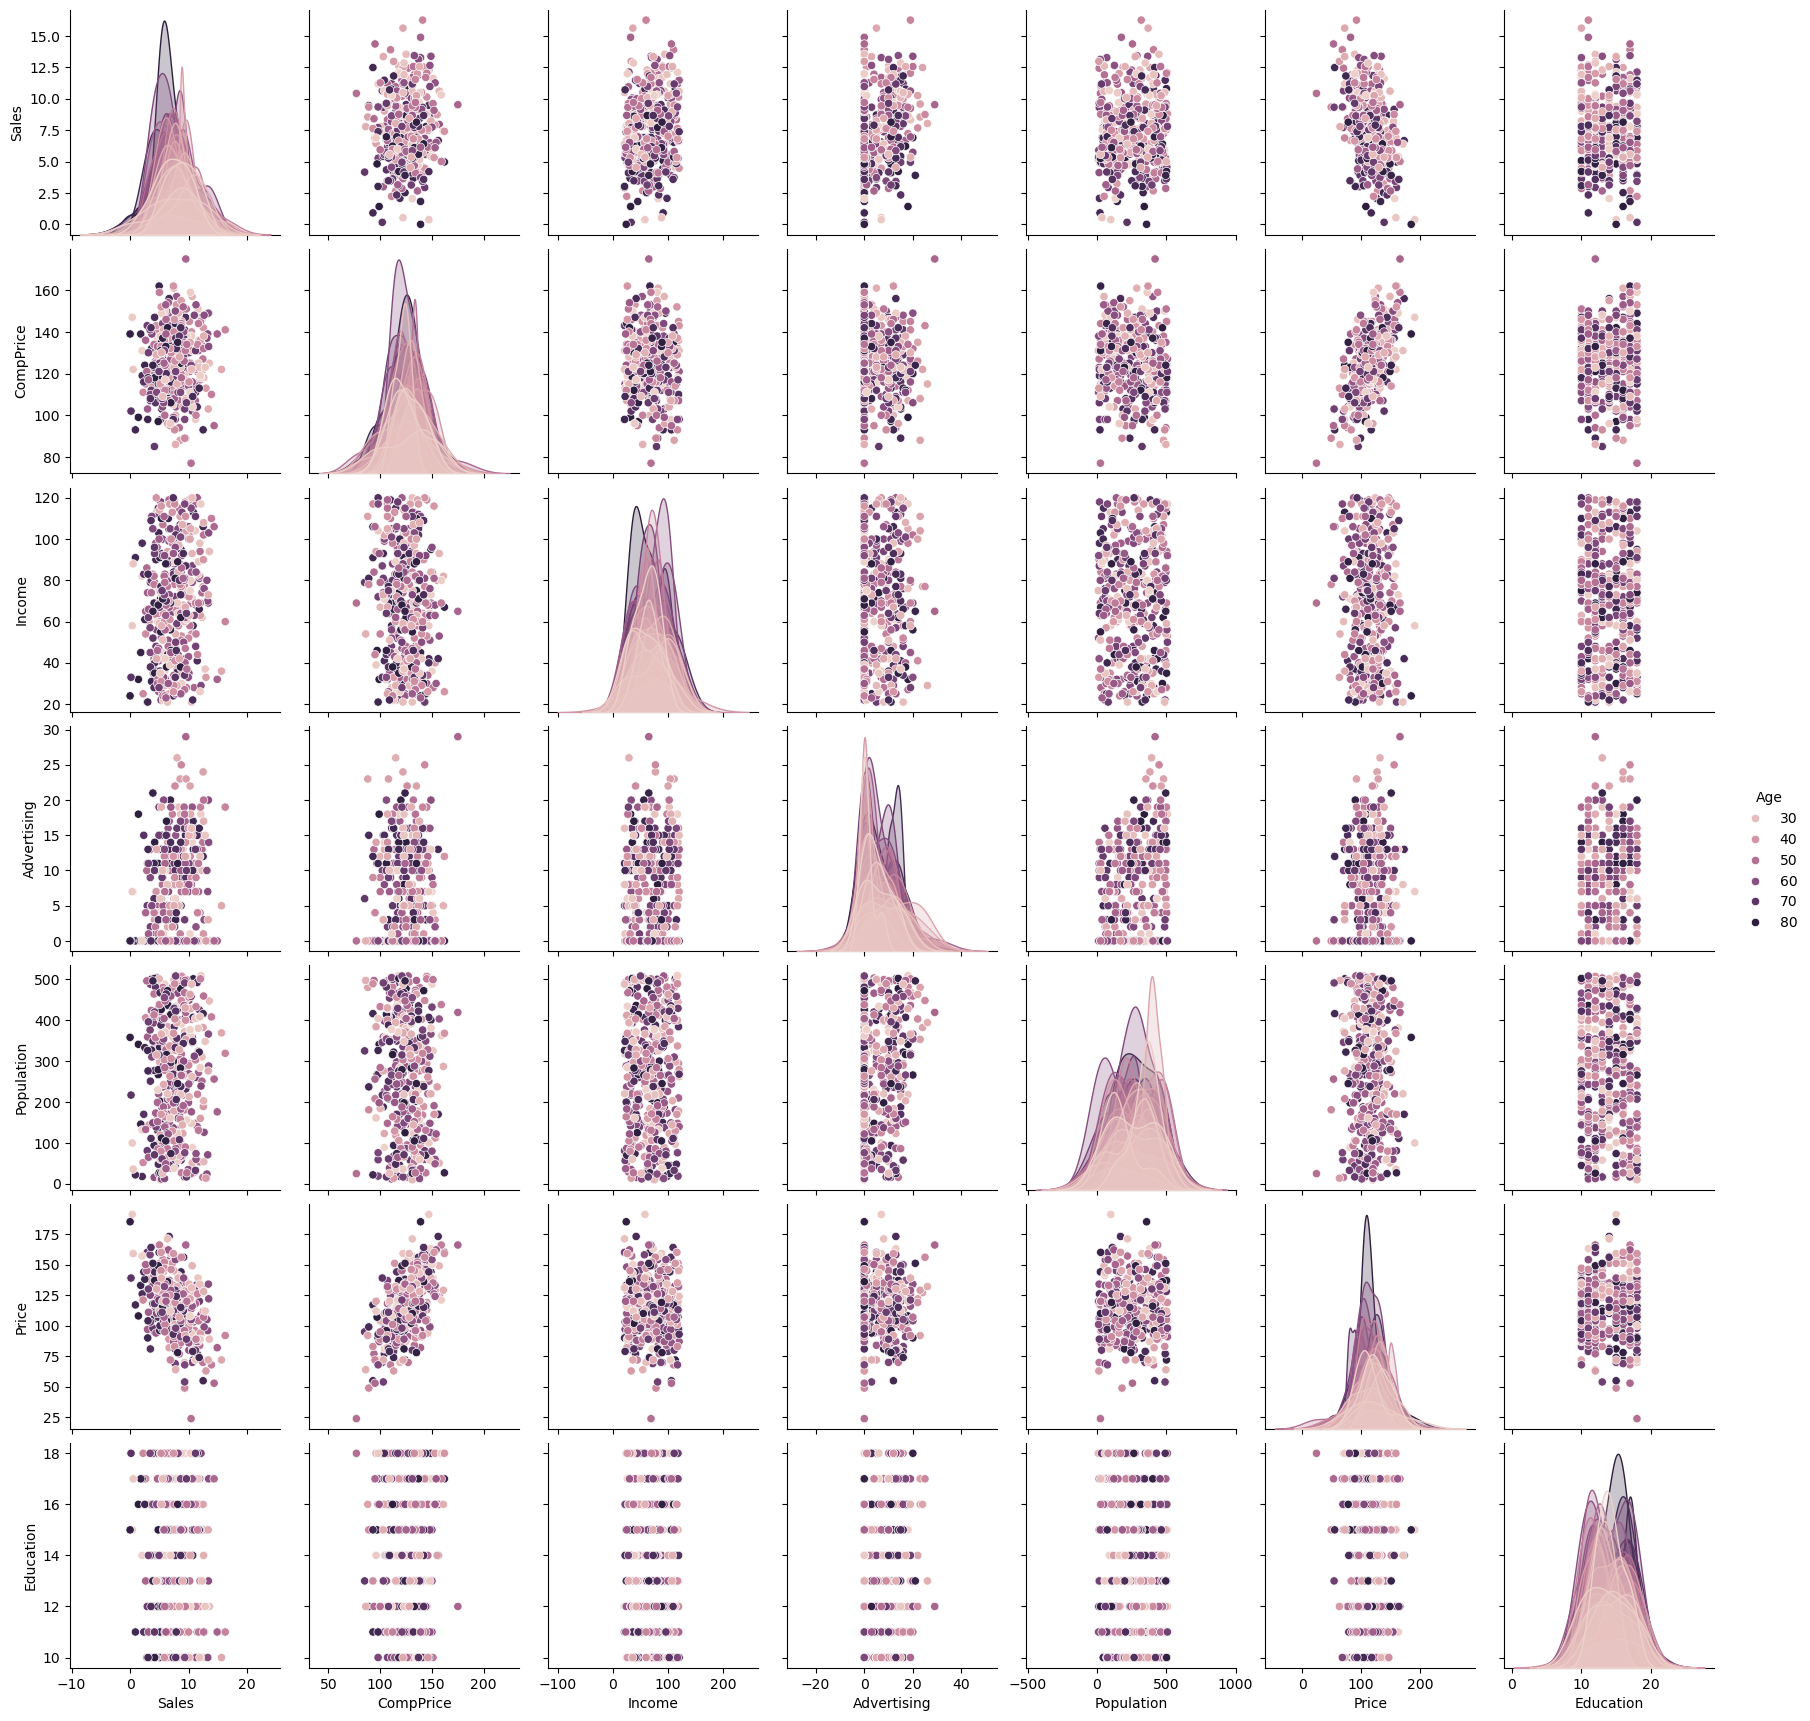

In [16]:
sns.pairplot(data,hue='Age')

In [17]:

independent_features=[column for column in corr_matrix.columns if not any(corr_matrix[column]>0.9)]
independent_features

[]

#Independent features do not have high correlation with each other.


In [18]:
data['Age_Binned'] = pd.qcut(data['Age'], q=3, labels=["Young", "Middle-aged", "Old"])
print("\nDiscretized Age (Equi-Frequency Binning):\n", data[['Age', 'Age_Binned']])



Discretized Age (Equi-Frequency Binning):
      Age   Age_Binned
0     42        Young
1     65          Old
2     59  Middle-aged
3     55  Middle-aged
4     38        Young
..   ...          ...
395   33        Young
396   55  Middle-aged
397   40        Young
398   50  Middle-aged
399   49  Middle-aged

[400 rows x 2 columns]


# Normalization methods for 'price','income','Avertizing'

#Min-Max Scaling

#Z-score Scaling

#Decimal Scaling


In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [20]:
scaler_minmax=MinMaxScaler()   #Scaled between 0 and 1
scaler_zscore=StandardScaler()   #standardization with mean=0, std=1

In [21]:
# Apply Min-Max Normalization
data['Price_minmax']=scaler_minmax.fit_transform(data[['Price']])

KeyError: 'Income_minmax'

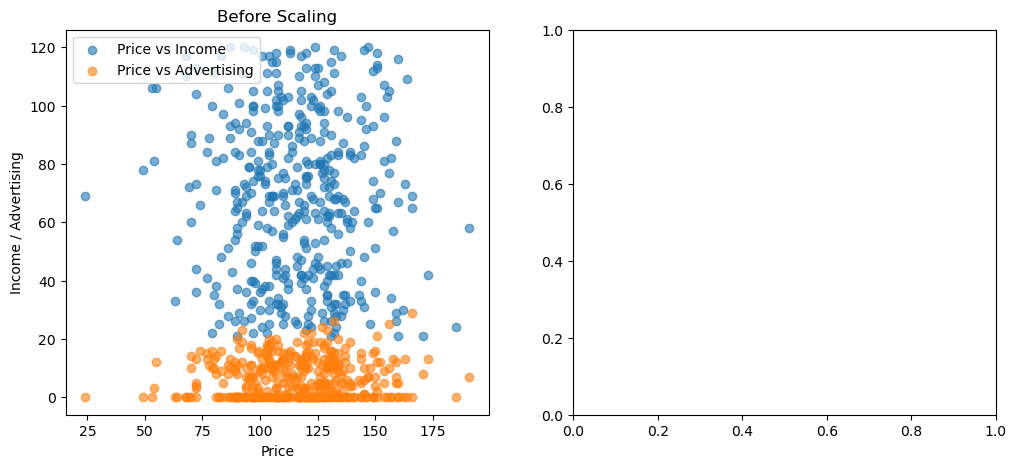

In [22]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot before scaling
ax1.scatter(data['Price'], data['Income'], label="Price vs Income", alpha=0.6)
ax1.scatter(data['Price'], data['Advertising'], label="Price vs Advertising", alpha=0.6)
ax1.set_title("Before Scaling")
ax1.set_xlabel("Price")
ax1.set_ylabel("Income / Advertising")
ax1.legend()


# Scatter plot after scaling
ax2.scatter(data['Price_minmax'], data['Income_minmax'], label="MinMax: Price vs Income", alpha=0.6)
ax2.scatter(data['Price_minmax'], data['Income_minmax'],label="MinMax: Price vs Advertising", alpha=0.6)
ax2.set_title("After Scaling")
ax2.set_xlabel("Price (Scaled)")
ax2.set_ylabel("Income / Advertising (Scaled)")
ax2.legend()

plt.show()

In [23]:
#Z-score Normalization

data[['Price_zscore', 'Income_zscore', 'Advertising_zscore']] = scaler_zscore.fit_transform(data[['Price', 'Income', 'Advertising']])
data[['Price_zscore', 'Income_zscore', 'Advertising_zscore']]

,Price_zscore,Income_zscore,Advertising_zscore
0,0.177823,0.155361,0.657177
1,-1.386854,-0.739060,1.409957
2,-1.513719,-1.204159,0.506621
3,-0.794814,1.121336,-0.396715
4,0.516132,-0.166631,-0.547271
...,...,...,...
395,0.516132,1.407551,1.560513
396,0.177823,-1.633482,-0.547271
397,1.827078,-1.526151,0.807733
398,-0.879391,0.370022,0.054953


In [24]:
data['price']

KeyError: 'price'

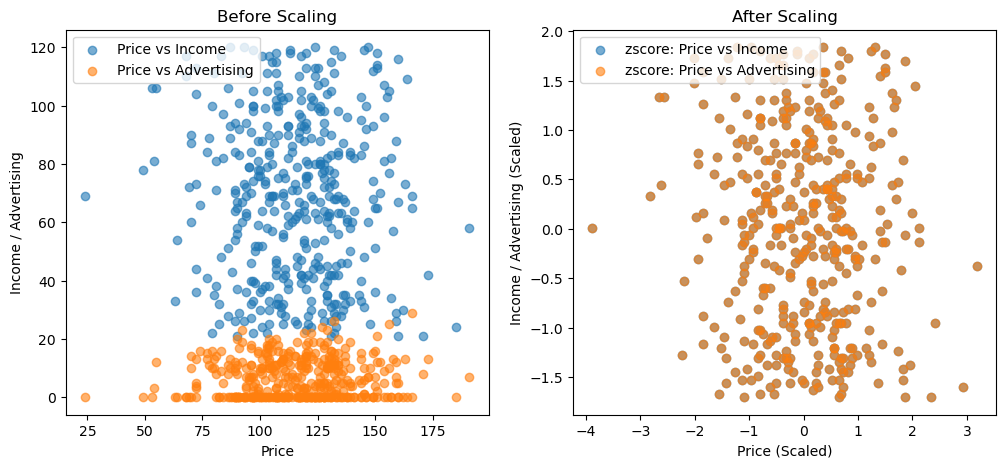

In [25]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Scatter plot before scaling
ax1.scatter(data['Price'], data['Income'], label="Price vs Income", alpha=0.6)
ax1.scatter(data['Price'], data['Advertising'], label="Price vs Advertising", alpha=0.6)
ax1.set_title("Before Scaling")
ax1.set_xlabel("Price")
ax1.set_ylabel("Income / Advertising")
ax1.legend()


# Scatter plot after scaling
ax2.scatter(data['Price_zscore'], data['Income_zscore'], label="zscore: Price vs Income", alpha=0.6)
ax2.scatter(data['Price_zscore'], data['Income_zscore'], label="zscore: Price vs Advertising", alpha=0.6)
ax2.set_title("After Scaling")
ax2.set_xlabel("Price (Scaled)")
ax2.set_ylabel("Income / Advertising (Scaled)")
ax2.legend()

plt.show()

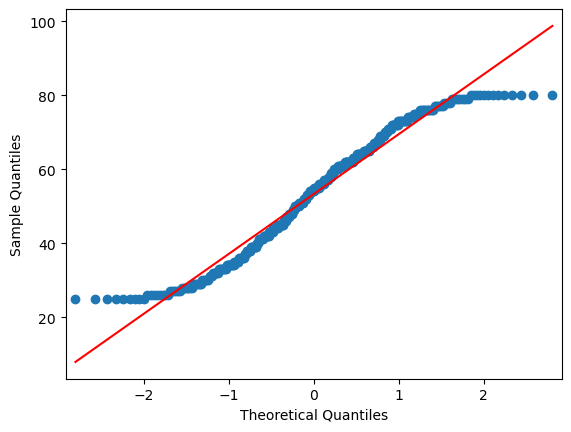

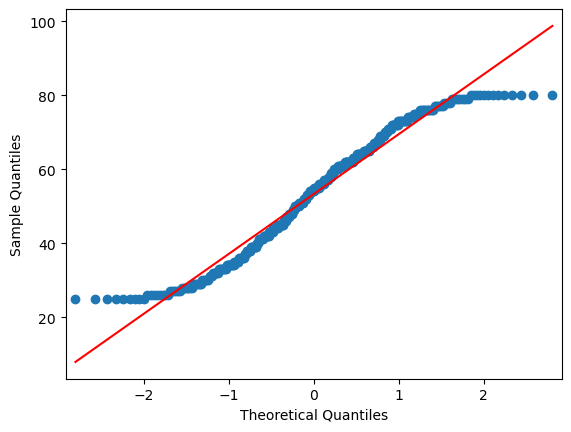

In [26]:
import statsmodels.api as stat
import scipy as sci
import numpy as np
stat.qqplot(data['Age'],line='s')

ValueError: Could not interpret value `Income_minmax` for `y`. An entry with this name does not appear in `data`.

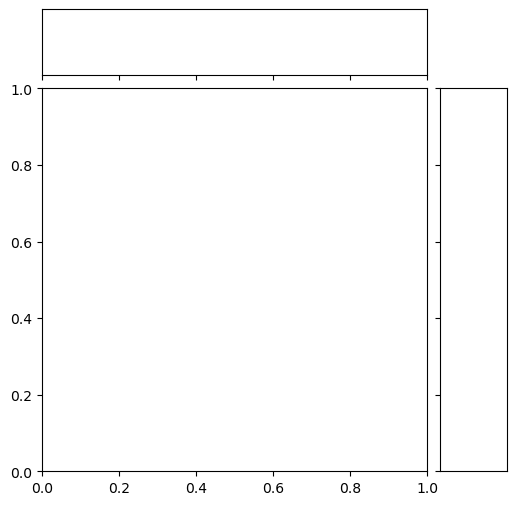

In [27]:
sns.jointplot(data,x='Price_minmax',y='Income_minmax')

In [ ]:
fig=plt.subplot(projection='3d')
fig.scatter(data['Sales'],data['Income'],data=['Price'])